Assignment 3 - Support Vector Machines

# Table of Contents:

# Assignment Questions:

# Package Imports:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data:

In [9]:
file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
# Load the dataset
sales_data = pd.read_csv(file_path)

# Data Preprocessing:

In [10]:
# Implementing Customer Segmentation into the model
sales_data['Customer_Lifetime_Value'] = sales_data.groupby('Customer ID')['Total Price'].transform('sum')
sales_data['Purchase_Frequency'] = sales_data.groupby('Customer ID')['Customer ID'].transform('count')

# Create a binary outcome variable for loyalty membership ('Yes' -> 1, 'No' -> 0)
sales_data['Loyalty Member'] = sales_data['Loyalty Member'].apply(lambda x: 1 if x == 'Yes' else 0)

# Training and Running Model:

In [11]:
# Select features
X = sales_data[['Age', 'Quantity', 'Purchase_Frequency', 'Customer_Lifetime_Value']]
y = sales_data['Loyalty Member']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVC model with RBF kernel, lower regularization (C), and limit iterations
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42, C=0.1, max_iter=5000)

# Train the model
svm_model.fit(X_train_res_scaled, y_train_res)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

c:\Users\johne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# Evaluate and Visualize Model Performance:

Confusion Matrix:
 [[1495 1621]
 [ 430  454]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.48      0.59      3116
           1       0.22      0.51      0.31       884

    accuracy                           0.49      4000
   macro avg       0.50      0.50      0.45      4000
weighted avg       0.65      0.49      0.53      4000



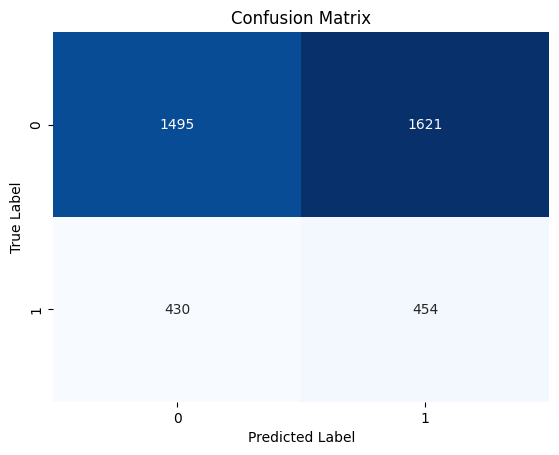

In [12]:
# Evaluate the model performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Output the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the performance - Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()